In [110]:
import pandas as pd
from math import radians, cos, sin, asin, sqrt
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [161]:
df = pd.read_csv('locations.csv')

In [162]:
df['latitude'] = df['latitude'].apply(lambda x: x*(math.pi)/180)
df['longitude'] = df['longitude'].apply(lambda x: x*(math.pi)/180)
df['timestamp'] = pd.to_datetime(df.timestamp)

In [163]:
def haversine(lat1, lon1, lat2, lon2, to_radians=False, earth_radius=6367):
    """
    slightly modified version: of http://stackoverflow.com/a/29546836/2901002

    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees or in radians)

    All (lat, lon) coordinates must have numeric dtypes and be of equal length.

    """
    if to_radians:
        lat1, lon1, lat2, lon2 = np.radians([lat1, lon1, lat2, lon2])

    a = np.sin((lat2-lat1)/2.0)**2 + \
        np.cos(lat1) * np.cos(lat2) * np.sin((lon2-lon1)/2.0)**2

    return earth_radius * 2 * np.arcsin(np.sqrt(a))

In [164]:
df['dist'] = \
    haversine(df.latitude.shift(), df.longitude.shift(),
                 df.loc[1:, 'latitude'], df.loc[1:, 'longitude'])

In [183]:
df_area = df.groupby('study_site')['dist'].mean()

<AxesSubplot:xlabel='study_site'>

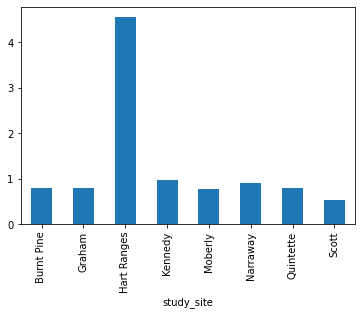

In [187]:
df_area.plot(kind = 'bar')